In [2]:
import pandas as pd
import numpy as np

# Load the dataset
food_consumption = pd.read_csv('food_consumption.csv')

# Display the first few rows to verify the data
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [3]:
# Create two DataFrames: one for Belgium and one for USA
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median for Belgium
print("Belgium Consumption Stats:")
print("Mean:", be_consumption['consumption'].mean())
print("Median:", be_consumption['consumption'].median())

# Calculate mean and median for USA
print("\nUSA Consumption Stats:")
print("Mean:", usa_consumption['consumption'].mean())
print("Median:", usa_consumption['consumption'].median())

Belgium Consumption Stats:
Mean: 42.13272727272727
Median: 12.59

USA Consumption Stats:
Mean: 44.650000000000006
Median: 14.58


In [4]:
# 1. Subset food_consumption for rows with data about Belgium and the USA
# We can use .isin() for a cleaner selection, or the OR operator | 
be_and_usa = food_consumption[food_consumption['country'].isin(['Belgium', 'USA'])]

# 2. Group by country and select only the consumption column
# 3. Calculate mean and median using .agg()
mean_median_consumption = be_and_usa.groupby('country')['consumption'].agg(['mean', 'median'])

# Display the result
print(mean_median_consumption)

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


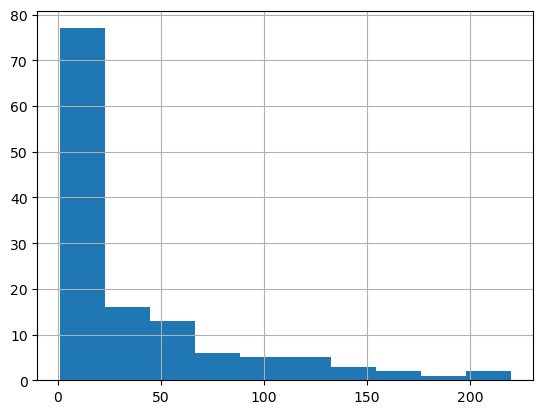

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [5]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))


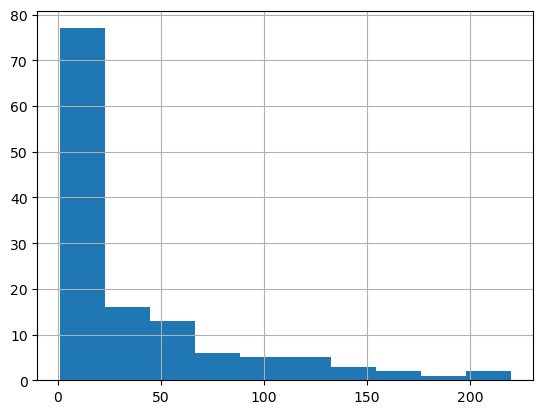

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))


In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.2,0.4,0.6,0.8,1]))
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


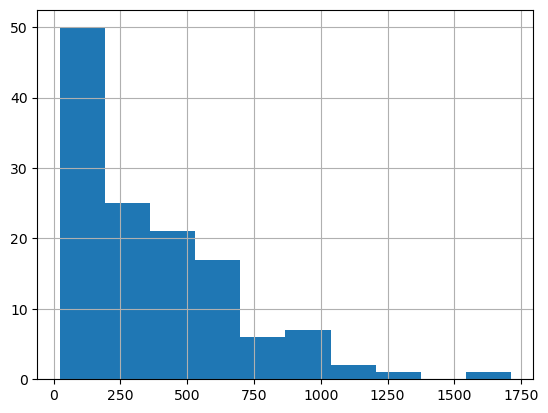

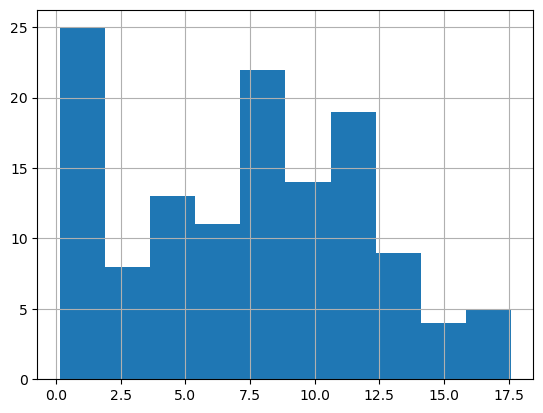

In [7]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()


In [8]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)


country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [9]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

non_outliers = emissions_by_country[(emissions_by_country >= lower) | (emissions_by_country <= upper)]
print(outliers)


country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [10]:
amir_deals = pd.read_csv('amir_deals.csv')
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)


product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [11]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)


     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


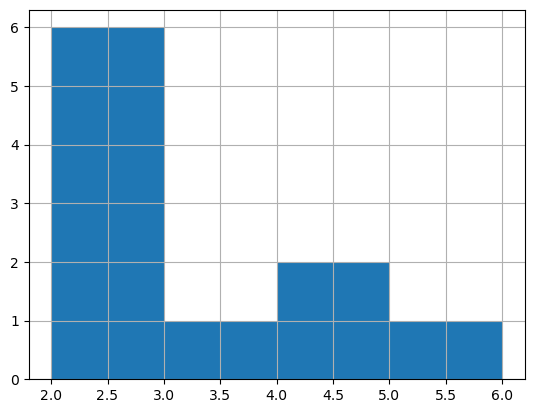

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [12]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)
